# China Eastern Airlines Flight 5735

#### Load Python tools

In [4]:
%load_ext lab_black

In [5]:
import pandas as pd
import geopandas as gpd
import geojson
import json
from shapely.geometry import Point, LineString

In [6]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

## Read [data](https://www.flightradar24.com/data/aircraft/b-1791) from Flightradar24

In [43]:
src = pd.read_csv("data/MU5735_2b367bc1.csv")

In [44]:
src.columns = src.columns.str.lower()

In [45]:
src["date"] = pd.to_datetime(src["utc"]).dt.date
src["time"] = pd.to_datetime(src["utc"]).dt.time

In [46]:
src[["latitude", "longitude"]] = src["position"].str.split(",", expand=True)

In [48]:
src = src[
    [
        "date",
        "time",
        "timestamp",
        "altitude",
        "speed",
        "direction",
        "latitude",
        "longitude",
    ]
].sort_values("time")

In [49]:
src.head(10)

,date,time,timestamp,altitude,speed,direction,latitude,longitude
0,2022-03-21,05:16:53,1647839813,8400,183,227,25.08835,102.905052
1,2022-03-21,05:17:04,1647839824,8600,197,229,25.08197,102.896881
2,2022-03-21,05:17:19,1647839839,8875,211,230,25.073175,102.885353
3,2022-03-21,05:17:34,1647839854,9100,233,230,25.064301,102.873535
4,2022-03-21,05:17:44,1647839864,9300,242,230,25.056061,102.862495
5,2022-03-21,05:17:58,1647839878,9825,254,228,25.04557,102.84877
6,2022-03-21,05:18:08,1647839888,10475,249,231,25.037796,102.838562
7,2022-03-21,05:18:20,1647839900,11100,245,231,25.029789,102.827576
8,2022-03-21,05:18:36,1647839916,11875,249,219,25.017883,102.813416
9,2022-03-21,05:18:41,1647839921,12125,254,205,25.011122,102.809181


In [50]:
src.tail(10)

,date,time,timestamp,altitude,speed,direction,latitude,longitude
53,2022-03-21,06:15:08,1647843308,29100,455,102,23.482864,110.097191
54,2022-03-21,06:16:10,1647843370,29100,455,102,23.453979,110.235718
55,2022-03-21,06:17:12,1647843432,29100,454,100,23.42625,110.374756
56,2022-03-21,06:18:14,1647843494,29100,455,99,23.403809,110.513969
57,2022-03-21,06:19:09,1647843549,29100,457,100,23.38353,110.638763
58,2022-03-21,06:19:59,1647843599,29100,457,100,23.36508,110.751343
59,2022-03-21,06:22:16,1647843736,9075,455,74,23.327911,111.063889
60,2022-03-21,06:22:27,1647843747,6525,414,75,23.333084,111.086357
61,2022-03-21,06:22:31,1647843751,4375,442,73,23.335327,111.097542
62,2022-03-21,06:22:35,1647843755,3225,376,87,23.337524,111.105583


In [52]:
geo_df = gpd.GeoDataFrame(
    src, geometry=gpd.points_from_xy(src["longitude"], src["latitude"])
)

In [57]:
geo_df["flight"] = "China Eastern Airlines Flight 5735"

In [63]:
geo_df["date"] = geo_df["date"].astype(str)

In [64]:
lines = (
    geo_df.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

<AxesSubplot:>

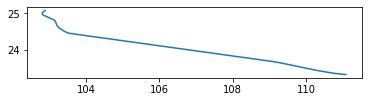

In [65]:
lines.plot()

## Export 

In [66]:
src.to_csv("../../usc/data/geo/china-eastern-crash-points.csv", index=False)
lines.to_file("../../usc/data/geo/china-eastern-crash-lines.geojson", driver="GeoJSON")